75.4 % accuracy with  500  samples.
81.0 % accuracy with  200  samples.
77.21354166666666 % accuracy with  768  samples.


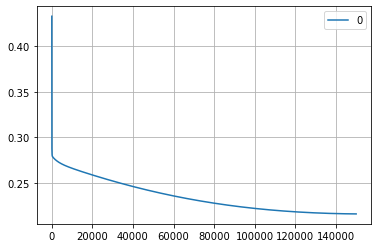

In [1]:
import numpy as np
import pandas as pd 
np.set_printoptions(suppress=True)

def sigmoid(wx_sum):
    return 1/(1+np.exp(-wx_sum))
def cross_entropy_function(targets, predictions):
    return -(targets*np.log10(predictions)+ (1-targets)*np.log10(1-predictions))

def optimiz_weights(features,weights,learing_rate,targets,predictions):
    new_weights = weights -(1/len(targets))*learing_rate*(features.T.dot(predictions-targets))
    return new_weights
def optimiz_bias(bias,weights,learing_rate,targets,predictions):
    loss = targets-predictions
    for l in loss:
        opt_bias = bias + learing_rate * l
    return opt_bias

def training(features,targets,weights,epochs,learing_rate,bias):
    epoch_loss = []
    for run in range(epochs):
        wx_sum = np.dot(features,weights)+bias

        predictions = sigmoid(wx_sum)
        loss = cross_entropy_function(targets,predictions)
#         loss = targets - predictions
        epoch_loss.append((sum(loss)/len(loss)))
        weights = optimiz_weights(features,weights,learing_rate,targets,predictions)
        bias = optimiz_bias(bias,weights,learing_rate,targets,predictions)

    accuracy(predictions,targets,bias)
    df = pd.DataFrame(epoch_loss)
    df_plot = df.plot(kind='line',grid=True).get_figure()
    return bias,weights
def accuracy(predictions,targets,bias):
    total = 0
    for p,t in zip(predictions,targets):
        if round(p)==t:
            total +=1
    print(total/len(predictions)*100,'% accuracy with ',len(predictions),' samples.')
def test(features,targets,weights,bias):
    wx_sum = np.dot(features,weights)+bias
    predictions = sigmoid(wx_sum)
    accuracy(predictions,targets,bias)
        
        
# Loading Data
data = pd.read_csv('diabetes.csv')  
all_targets = data["Outcome"].to_numpy() #the real results to be compeared to the perceptron prediction
data.fillna(0)
data = data.drop(columns="Outcome") #drop the results from our process
data = data[:].values #make the dataframe a simple array of arrays
training_data = np.array(data[:500])
training_targets= np.array(all_targets[:500])

weights = np.random.rand(8)*0.01
bias = 0.5
learing_rate = 0.0001
epochs = 150000

bias,weights = training(training_data,training_targets,weights,epochs,learing_rate,bias)
test(data[500:700],all_targets[500:700],weights,bias)
test(data,all_targets,weights,bias)



    
        
    
    
